In [1]:
#Imports
import numpy as np, pandas as pd, matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [4]:
df.id.duplicated().sum()

1860

In [3]:
control_df = df.query('group == "control"')

In [4]:
control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()

In [5]:
control_ctr

0.2797118847539016

In [6]:
experiment_df = df.query('group == "experiment"')

In [7]:
experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()

In [8]:
experiment_ctr

0.3097463284379172

In [9]:
obs_diff = experiment_ctr - control_ctr
obs_diff

0.030034443684015644

In [10]:
df.sample(5, replace = True)

,timestamp,id,group,action
3129,2016-11-08 17:59:01.224139,560729,control,view
620,2016-10-03 04:42:04.835178,263533,control,click
7897,2017-01-14 09:23:56.567372,919244,experiment,click
7026,2017-01-02 17:40:48.005747,934360,control,view
6530,2016-12-26 21:30:59.922730,259386,experiment,view


### Steps

1. Make 10,000 simulations.
2. Calculate the **observed difference** (`obs_diff` in the code) in each simulation.
3. Find the standard deviation of sample `obs_diff` distribution (also called **sampling distribution**).
4. Create a random normal distribution with mean 0 and standard deviation found above. This is called **distribution under the null hypothesis.**
5. Find out where the **observed statistic** (i.e. obs_diff calculated from the experiment) falls in the normal distribution.
6. All sampling obs_diffs to the right of the observed statistic are *all the null values that are more extreme than our statistic in favor of our alternative*. The *mean* of them is called the **p-value**.

   Remember from the [what is a p-value anyway?](https://learn.udacity.com/nanodegrees/nd002/parts/cd0005/lessons/ls12051/concepts/dfa44c5e-3314-49e3-9b2f-073061d97d98) lesson that this is the p-value:
   ![p-value](p-value.png)
7. If the p-value is small enough (usually < 0.05, this threshold is called **alpha**), we may reject the null hypothesis.

   *Why is that so?* Because, if the mean of the data that we have is far enough from the mean of the sampling **distribution under the null hypothesis**, we can say that the data are likely taken from a different population. Hence, based on these data, we may reject the null hypothesis.

In [21]:
#Bootstrap
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace = True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr-control_ctr)
    

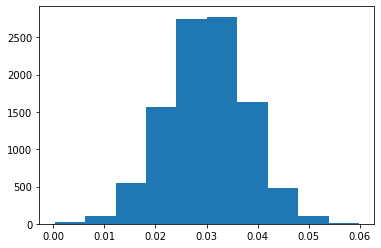

In [14]:
#histogram of the bootstrap sample for alternative
plt.hist(diffs);

In [16]:
#histogram for the null
diffs = np.array(diffs)
null_vals = np.random.normal(0,diffs.std(),diffs.size)

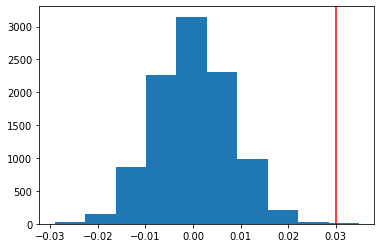

In [17]:
plt.hist(null_vals);
plt.axvline(x=obs_diff, color='red');

In [22]:
p_value = (null_vals > obs_diff).mean()
print("p-value is", p_value)

p-value is 0.0003


In [20]:
obs_diff

0.030034443684015644

### Checking a single sampling results

- Run a few times and see the values change.
- Change the `replace` parameter to `False` and see the values remain the same.

In [19]:
diffs1 = []
b_samp = df.sample(df.shape[0], replace = True)
print("sample size:", b_samp.shape[0])
control_df = b_samp.query('group == "control"')
experiment_df = b_samp.query('group == "experiment"')
control_unique_clicks = control_df.query('action == "click"').id.nunique()
control_unique_views = control_df.query('action == "view"').id.nunique()
print("control_unique_clicks:", control_unique_clicks)
print("control_unique_views:", control_unique_views)
control_ctr = control_unique_clicks / control_unique_views
print("control_ctr:", control_ctr)

experiment_unique_clicks = experiment_df.query('action == "click"').id.nunique()
experiment_unique_views = experiment_df.query('action == "view"').id.nunique()
print("experiment_unique_clicks:", experiment_unique_clicks)
print("experiment_unique_views:", experiment_unique_views)
experiment_ctr = experiment_unique_clicks / experiment_unique_views
print("experiment_ctr:", experiment_ctr)
diffs1.append(experiment_ctr-control_ctr)

sample size: 8188
control_unique_clicks: 586
control_unique_views: 2108
control_ctr: 0.27798861480075904
experiment_unique_clicks: 586
experiment_unique_views: 1883
experiment_ctr: 0.3112055231014339
